In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

conn = duckdb.connect()

In [2]:
data_url = "hf://datasets/ibm/duorc@refs%2Fconvert%2Fparquet/ParaphraseRC/train/0000.parquet"

# Read directly, adding row numbers
pq_rel = conn.read_parquet(data_url, file_row_number=True)

In [3]:
# Check column names
print(pq_rel.columns)

# Check row count
row_count = conn.sql("""
    SELECT COUNT(*) 
    FROM pq_rel
""").fetchone()[0]
print(f"Number of rows: {row_count}")

one_row = conn.sql("""
    SELECT * 
    FROM pq_rel
    LIMIT 1
""")
print(one_row)

['plot_id', 'plot', 'title', 'question_id', 'question', 'answers', 'no_answer', 'file_row_number']
Number of rows: 69524
┌───────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [4]:
selected_rel = pq_rel.select("""
    file_row_number AS row_id,
    title,
    plot,
    question,
    answers,
    LENGTH(plot) AS plot_length,
    LENGTH(question) AS question_length,
    ARRAY_LENGTH(answers) AS num_answers
""")
selected_rel.to_table("duorc_data_v1")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

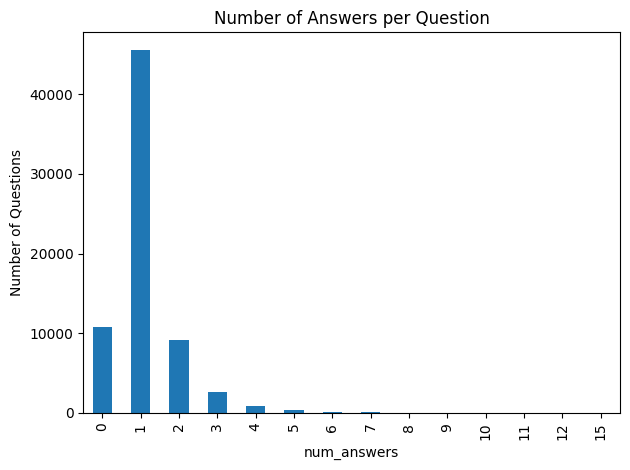

In [5]:
# Plot: Number of answers per question
answer_counts = conn.sql("""
    SELECT num_answers, COUNT(*) AS count
    FROM duorc_data_v1
    GROUP BY num_answers
    ORDER BY num_answers
""").df()

answer_counts.plot.bar(x='num_answers', y='count', title='Number of Answers per Question', legend=False)
plt.ylabel("Number of Questions")
plt.tight_layout()
plt.show()
